# Importing all the libraries

In [1]:
from env import Grid_World
import gymnasium as gym
import numpy as np  
import matplotlib.pyplot as plt 

# Initialising the Environment 

In [2]:
env_size = 4
env = Grid_World(size = env_size, type= "fixed", render_mode= "rgb_array")

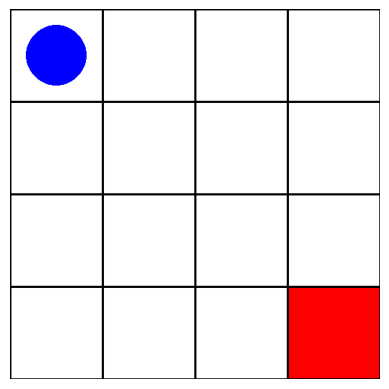

In [3]:
state, target = env.reset()
frame = env.render()
plt.axis('off')
plt.imshow(frame)

# Defining the policy

In [4]:
policy_probablities = np.full((env_size, env_size, 4), 0.25)
print(policy_probablities)

[[[0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]]

 [[0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]]

 [[0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]]

 [[0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]]]


In [5]:
def policy(state):
    policy_probs = policy_probablities[state]
    return np.random.choice(4, p = policy_probs)

# Value table

In [6]:
state_values = np.zeros(shape = (env_size, env_size))
print(state_values)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


# Implementing the policy iteration algorithm

In [7]:
def policy_evaluation(policy_probablities, state_values, theta = 1e-6, gamma= 0.99) ->  None:
    delta = float("inf")

    while delta > theta: 
        delta = 0
        for row in range(env_size):
            for col in range(env_size):
                state = (row,col)
                old_value = state_values[state]
                new_value = 0.
                action_probablities = policy_probablities[state]

                for action, prob in enumerate(action_probablities):
                    next_state, reward, _, _ = env.simulate_step(state, action)
                    new_value += prob * (reward + gamma * state_values[next_state])

                state_values[state] = new_value
                delta = max(delta, abs(old_value - new_value))

In [8]:
def policy_improvement(policy_probablities, state_values, gamma = 0.99):
    policy_stable = True

    for row in range(env_size): 
        for col in range(env_size):
            state = (row, col)
            old_action = policy_probablities[state].argmax()

            new_action = None
            max_qsa = float("-inf")

            for action in range(4):
                next_state, reward, _, _ = env.simulate_step(state, action)
                qsa = reward + gamma * state_values[next_state]

                if qsa > max_qsa: 
                    new_action = action
                    max_qsa = qsa

        action_probs = np.zeros(4)
        action_probs[new_action] = 1.
        policy_probablities[state[0], state[1]] = action_probs

        if new_action != old_action:
            policy_stable = False

    return policy_stable

In [9]:
def policy_iteration(policy_probablities, state_values, theta = 1e-6, gamma = 0.99):
    policy_stable = False

    while not policy_stable:
        policy_evaluation(policy_probablities, state_values, theta, gamma)
        policy_stable = policy_improvement(policy_probablities, state_values, gamma)

In [10]:
policy_iteration(policy_probablities, state_values)

ValueError: setting an array element with a sequence.